<a href="https://colab.research.google.com/github/Nkanga-Pedro/Studying/blob/master/Lab3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
fruits = pd.read_table('fruits.txt')

In [ ]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
fruits.describe

<bound method NDFrame.describe of     fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1   

In [ ]:
fruits.shape

(59, 7)

In [ ]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [ ]:
fruits.groupby('fruit_label').size()

fruit_label
1    19
2     5
3    19
4    16
dtype: int64

C:\Users\Gebruiker\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


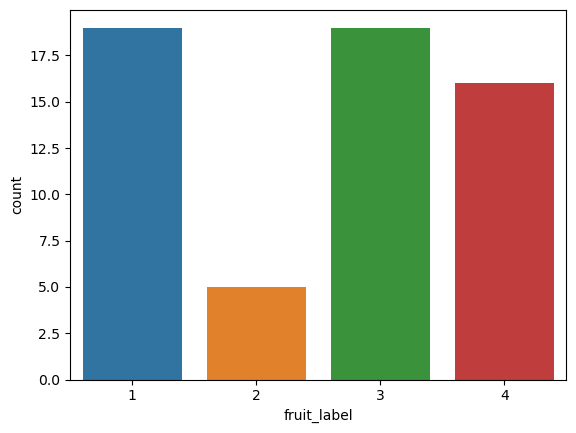

In [ ]:
import seaborn as sns
sns.countplot(fruits['fruit_label'],label="Count")
plt.show()

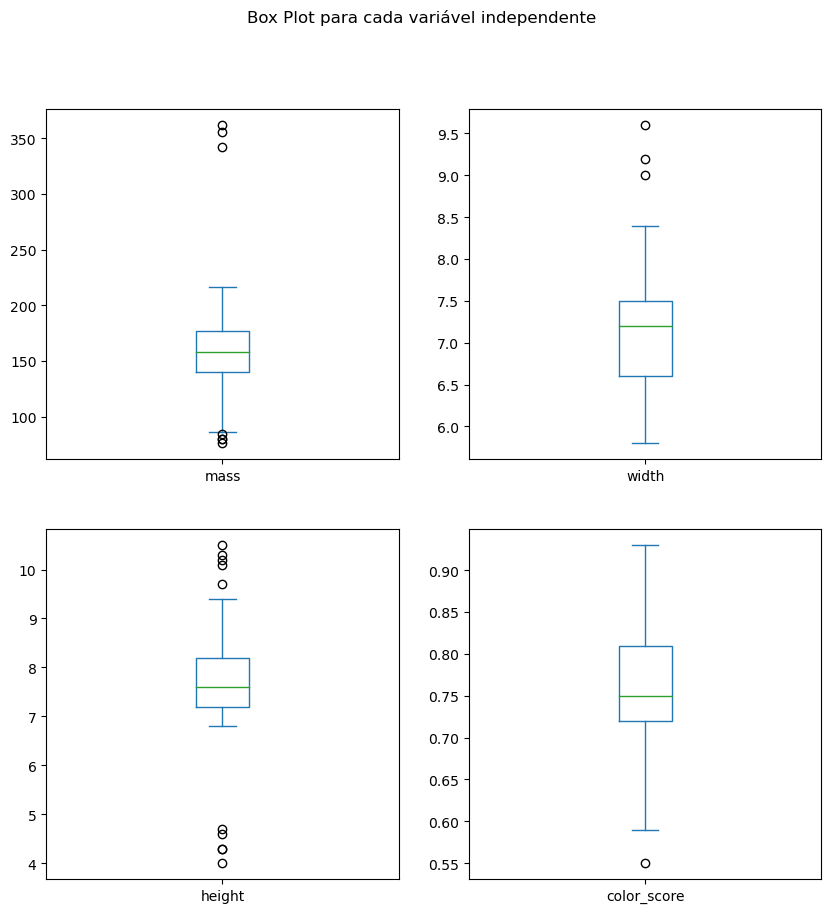

In [ ]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2),
                                        sharex=False, sharey=False, figsize=(10,10),
                                        title='Box Plot para cada variável independente')
plt.show()

<AxesSubplot:xlabel='fruit_name', ylabel='color_score'>

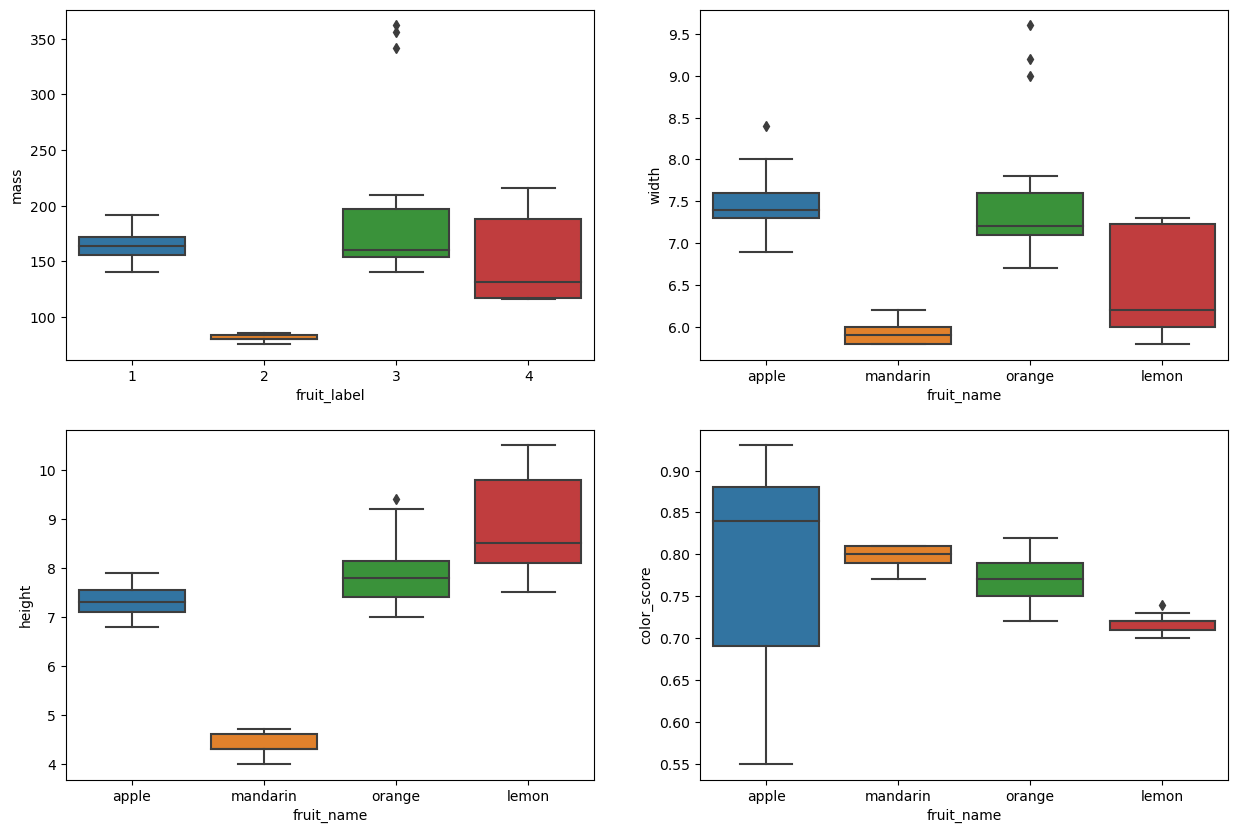

In [ ]:
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)
sns.boxplot(x='fruit_label',y='mass',data=fruits)    
plt.subplot(2,2,2)    
sns.boxplot(x='fruit_name',y='width',data=fruits)    
plt.subplot(2,2,3)    
sns.boxplot(x='fruit_name',y='height',data=fruits)    
plt.subplot(2,2,4)    
sns.boxplot(x='fruit_name',y='color_score',data=fruits)

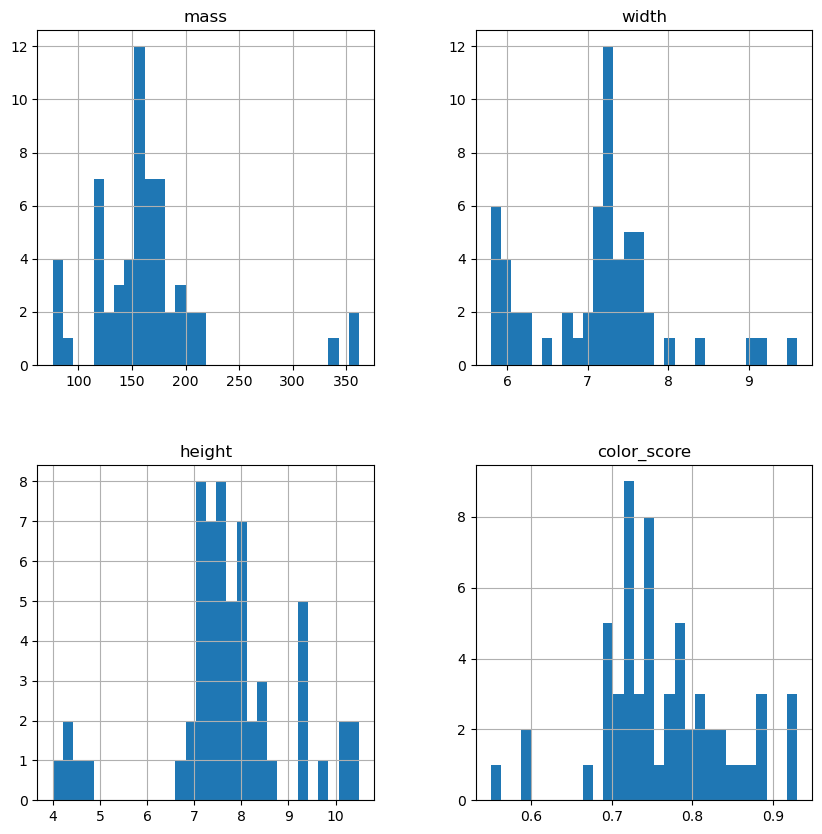

In [ ]:
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(10,10))
plt.show()

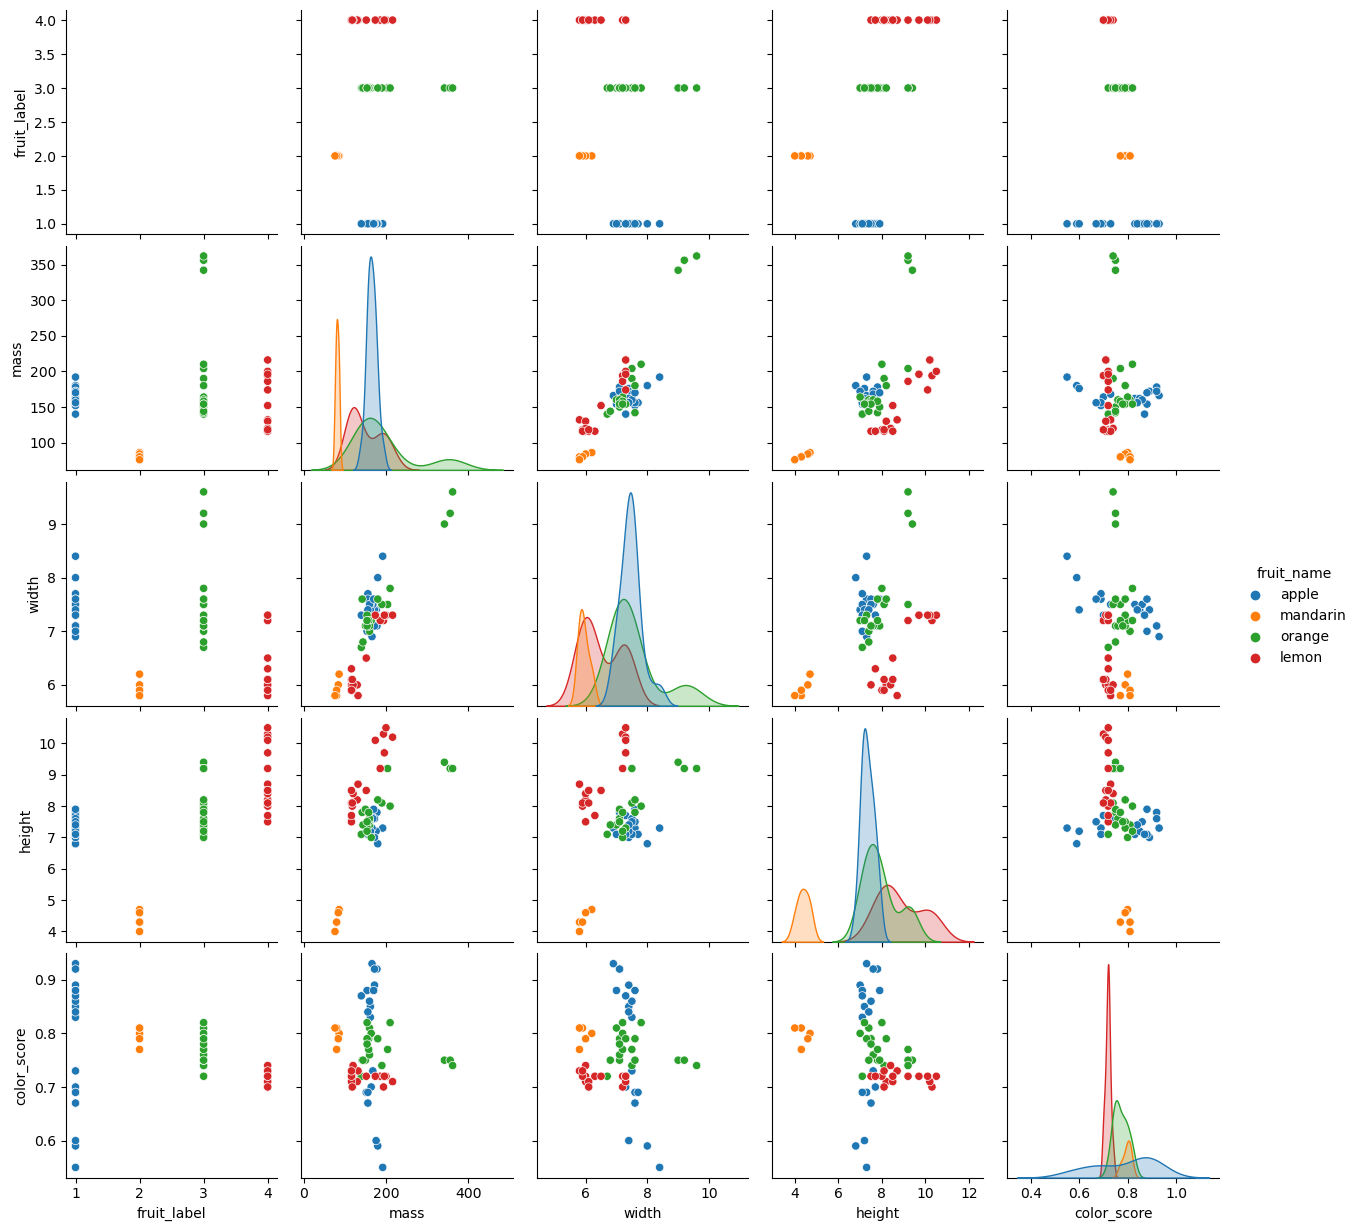

In [ ]:
sns.pairplot(fruits,hue='fruit_name')

In [ ]:
#Características que iremos considerar
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
# Classe da fruta que queremos determinar (variável dependente ou alvo)
y = fruits['fruit_label']
print(X.shape)
print(y.shape)

(59, 4)
(59,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xscaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
#Divisão do nosso dataset normalizado em conjuntos de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, random_state=0)
#print(X_train)
#print(X_train.shape)
#print(X_test)
#print(X_test.shape)
#print(y_train)
#print(y_train.shape)
#print(y_test)
#print(y_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Inicializar o modelo da regressão logística
logreg = LogisticRegression()
# passar os dados ao modelo para que este possa ajustar os seus parâmetros
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Calcular a exatidão ou acurácia (accuracy) do classificador com regressão
# logística no conjunto de treino (o que é pouco interessante)
y_pred = logreg.predict(X_train)
logreg_acc = accuracy_score(y_train, y_pred)
print('Exatidão no conjunto de treino: {:.2f}'.format(logreg_acc))
# Calcular a exatidão ou acurácia (accuracy) do classificador com regressão
# logística no conjunto de teste (o que é MESMO interessante)
y_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred)
print('Exatidão no conjunto de teste: {:.2f}'.format(logreg_acc))

Exatidão no conjunto de treino: 0.73
Exatidão no conjunto de teste: 0.47


In [ ]:
#Dados de duas peças de fruta
Xnew = [[192,10,9,0.88],[80, 5.9, 4.3,0.81]]
ynew = logreg.predict(Xnew)
print(ynew)

[3 3]


In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[4 0 0 0]
 [1 0 0 0]
 [6 0 1 1]
 [0 0 0 2]]


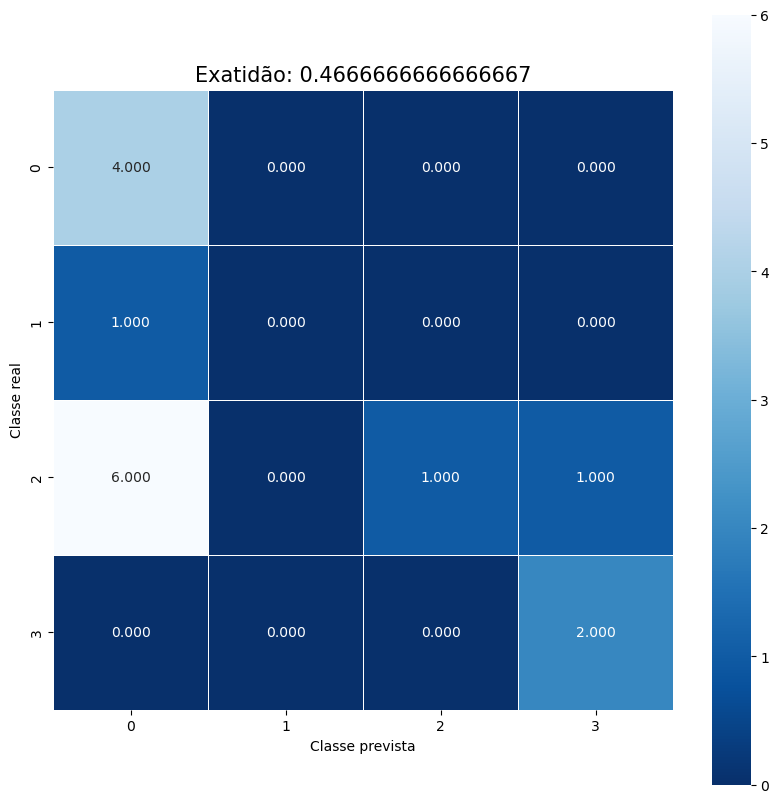

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Classe real');
plt.xlabel('Classe prevista');
all_sample_title = 'Exatidão: {0}'.format(logreg_acc)
plt.title(all_sample_title, size = 15);